<a href="https://colab.research.google.com/github/dantv2002/PracticeML/blob/main/review_ann_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# Load in the data
dataset = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = dataset.load_data()
X_train =  X_train / 255.0
X_test = X_test / 255.0
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# Build the ANN
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax'),

])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#  Train the model
logs = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2905 - accuracy: 0.9152 - val_loss: 0.1425 - val_accuracy: 0.9591
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1429 - accuracy: 0.9564 - val_loss: 0.0989 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1082 - accuracy: 0.9676 - val_loss: 0.0856 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0863 - accuracy: 0.9730 - val_loss: 0.0800 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0759 - accuracy: 0.9764 - val_loss: 0.0798 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0663 - accuracy: 0.9788 - val_loss: 0.0704 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0568 - accuracy: 0.9808 - val_loss: 0.0769 - val_accu

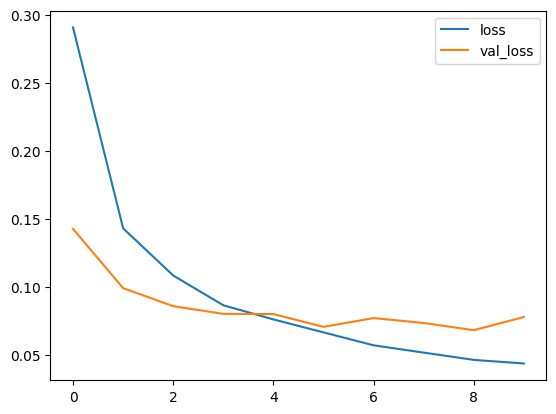

In [ ]:
import matplotlib.pyplot as plt

# Plot loss per epoch
plt.plot(logs.history['loss'], label='loss')
plt.plot(logs.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

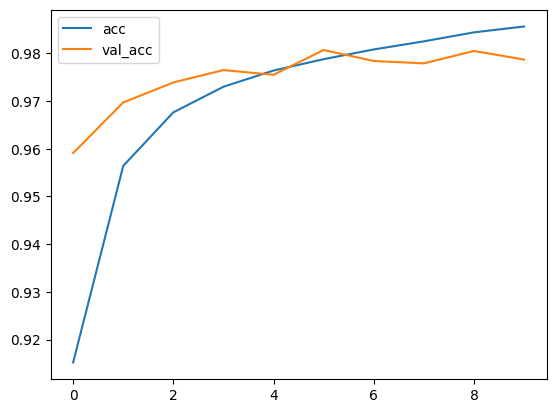

In [ ]:
# Plot accuracy per epoch
plt.plot(logs.history['accuracy'], label='acc')
plt.plot(logs.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
print("Training set: ", model.evaluate(X_train, Y_train))
print("Testing set: ", model.evaluate(X_test, Y_test))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0191 - accuracy: 0.9943
Training set:  [0.019078422337770462, 0.9943166375160217]
313/313 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9787
Testing set:  [0.07764322310686111, 0.9786999821662903]


313/313 [==============================] - 1s 1ms/step
Confusion matrix, without normalization
[[ 971    0    1    2    0    0    3    1    2    0]
 [   0 1126    4    0    0    0    2    0    3    0]
 [   6    2 1009    4    3    0    1    3    4    0]
 [   0    0    5  993    0    4    0    2    4    2]
 [   0    0    1    0  963    0    6    4    2    6]
 [   3    0    0   14    1  867    3    0    2    2]
 [   4    3    0    2    2    5  942    0    0    0]
 [   1    5   17    9    0    0    0  986    4    6]
 [   4    0    3    6    4    0    1    2  950    4]
 [   3    2    0    5   13    2    0    1    3  980]]


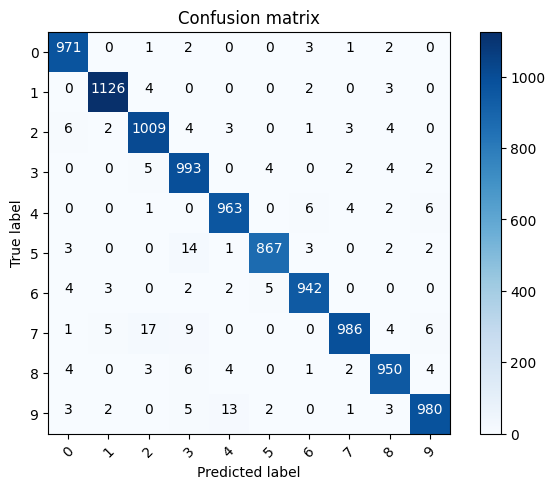

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


P_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, P_test)
plot_confusion_matrix(cm, list(range(10)))

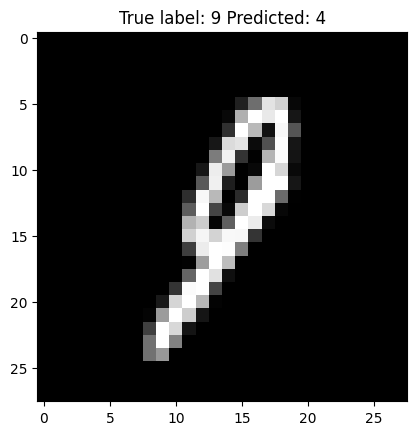

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(P_test != Y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (Y_test[i], P_test[i]));
